# A Basic Model of Electricity and Heat Systems

Consider a stylized model of the electricity and heat systems where a portfolio of generators (indexed $i$) competes to serve a time varying demand for electricity $(D_h^E)$ and heat $(D_h^H)$, where $h$ refers to hours. The consumers' willingness to pay are 100 €/MWh for both electricity and heat throughout all hours. The system relies on four different type of generators:

- <u>Standard (dispatchable) plants</u> use a combination of primary energy carriers (indexed by $j$) and an aggregate of other inputs $(oth)$ to produce either electricity or heat. Let $\mu_j^i$ denote the input share of energy carrier $j$ for generator $i$, measured as MWh input of energy carrier $j$ per MWh output of electricity or heat. Let $E_{i,h}$ and $H_{i,h}$ denote the hourly generation of electricity and heat, and let $q_i$ denote the installed hourly generating capacity for the plant $i$.
- <u>Intermittent plants</u> are similar to standard plants, except that hourly generating capacity is defined as $q_{i,h} = q_i \gamma_{i,h}$ where $\gamma_{i,h}\in[0,1]$ indicates availability of generator $i$ in hour $h$. We use the notation $\mathcal{I}^E$ ($\mathcal{I}^H$) to denote the set of all standard and intermittent electricity (heat) producing plants.    
- <u>Back-pressure plants</u> are similar to standard electricity producing plants, except that they utilize the excess heat from electricity production to co-produce heat. Let $\nu_i$ denote the electricity-to-heat ratio for a back-pressure plant $i$. We use the notation $\mathcal{I}^{BP}$ to denote the set of all back-pressure plants. 
- <u>Heat pumps</u> are slightly different than standard heat producing plants as they rely on electricity as energy input. Thus, heat pumps have negative electricity-to-heat ratios $(\nu_i<0)$. We use the notation $\mathcal{I}^{HP}$ to denote the set of all heat pumps.

The optimization problem is given by the system in (1):

\begin{align}
    \max_{E_{i,h}, H_{i,h}, D_h^E, D_h^H} \ &W = \sum_h\left( u_E\cdot D_h^E-\sum_{i \in \lbrace \mathcal{I}^E, \mathcal{I}^{BP}\rbrace}c_i\cdot E_{i,h}\right)-\sum_{i\in\lbrace \mathcal{I}^E,\mathcal{I}^{BP}\rbrace}\text{FOM}_i\cdot q_i^E \tag{1a} \\ 
    & \quad +{\sum_h\left( u_H\cdot D_h^H-\sum_{i \in \lbrace \mathcal{I}^H, \mathcal{I}^{HP}\rbrace}c_i\cdot H_{i,h}\right)-\sum_{i\in\lbrace \mathcal{I}^H, \mathcal{I}^{HP}\rbrace}\text{FOM}_i\cdot q_i^H} \notag \\
    &E_{i,h}= \nu_i H_{i,h}, \qquad \forall i\in\lbrace \mathcal{I}^{BP}, \mathcal{I}^{HP} \rbrace \tag{1b} \\
    &D_h^E = \sum_{i\in \lbrace \mathcal{I}^E, \mathcal{I}^{BP}, \mathcal{I}^{HP}\rbrace }E_{i,h}  \tag{1c}\\ 
    &D_h^H = \sum_{i\in \lbrace \mathcal{I}^H, \mathcal{I}^{BP}, \mathcal{I}^{HP}\rbrace} H_{i,h}  \tag{1d}\\ 
    &D_h^E\in[0, L_h^E]  \tag{1e}\\ 
    &D_h^H\in[0,L_h^H]  \tag{1f}\\ 
    &E_{i,h} \in[0,q_{i,h}^E], \qquad \forall i\in\lbrace \mathcal{I}^E,\mathcal{I}^{BP}\rbrace.  \tag{1g}\\
    &H_{i,h} \in[0,q_{i,h}^H], \qquad \forall i\in\lbrace \mathcal{I}^H, \mathcal{I}^{HP}\rbrace  \tag{1h}
\end{align}

---
**Notes** (see also MEE, p. 31)

- (1e) and (1f): we allow for load shedding, the actual load can be smaller
- (1b) co-generation constraint

# Part 1: Analytical exercises

## E1.1

__Describe the optimization problem above.__

---
**Solution**

- (1a) is the welfare function, which is the sum of consumer and producer surplus subtracted by total fixed operating other maintanence costs on both electricity and heat markets. 
    - Note that since $q_i$ is fixed, the fixed costs do not impact the optimal solution to the linear programming (LP) problem in (1).
- (1b) is the co-generation constraint of back-pressure plants $(\nu_{\lbrace i\in\mathcal{I^{BP}}\rbrace}>0)$ as well as the inverse electrical efficiency of heat pumps $(\nu_{\lbrace i\in\mathcal{I^{HP}}\rbrace}<0)$.
- (1c) is the equilibrium identity on the electricity market. Here, the "generation" from heat pumps is negative because they use electricity when generating heat.
- (1d) is the equilibrium identity on the heating market.
- (1e) and (1f) are domain constraints on demand. It essentially allows the optimal solution to entail demand curtailment. 
    - Note that we abstract from loadshedding here.
- Finally, (1g) and (1h) are domain constraints on generation, limiting maximum generation to be within capacity bounds. 

## E1.2

__Set up the Lagrangian for the optimization problem in [E1.1](#E1.1) and show that the first order conditions for $E_{i,h}$ and $H_{i,h}$ can be written as:__

\begin{align}
\forall i\in\mathcal{I}^E & : & - c_i+\lambda_h^E + \underline{\theta}_{i,h}^E-\overline{\theta}_{i,h}^E &= 0& \tag{2a}  \\
\forall i\in\mathcal{I}^{BP} & : & - c_i+\lambda_h^E + \frac{\lambda^H}{\nu_i} +\underline{\theta}_{i,h}^E-\overline{\theta}_{i,h}^E &= 0& \tag{2b}  \\
\forall i\in\mathcal{I}^{H} & : & - c_i+\lambda_h^H + \underline{\theta}_{i,h}^H-\overline{\theta}_{i,h}^H &= 0& \tag{2c}  \\
\forall i\in\mathcal{I}^{HP} & : & - c_i+\lambda_h^H + \nu_i\lambda^E +\underline{\theta}_{i,h}^H-\overline{\theta}_{i,h}^H &= 0& \tag{2d} 
\end{align}

where $\lambda^E$ and $\lambda^H$ denote the shadow costs of equilibrium constraints on electricity and heat markets in hour $h$, respectively, and $\underline{\theta}$ and $\overline{\theta}$ denote the shadow costs on the domain constraints on generation variables $E$ and $H$. 

*Note: Use the same notation as in the above*.

---
**Solution**

\begin{align}
    \mathcal{L} =& W + \sum_h\left( \Lambda_h^E + \Lambda_h^H + \sum_{i\in \lbrace \mathcal{I}^{BP}, \mathcal{I}^{HP}\rbrace }\Lambda_{h,i}^{CHP}\right) \\ 
    &+ \sum_h\left(\Theta_h^{DH}+\Theta_h^{DE}+\sum_{i\in \lbrace \mathcal{I}^{E}, \mathcal{I}^{BP}\rbrace}\Theta_{h,i}^E+\sum_{i\in \lbrace \mathcal{I}^{H}, \mathcal{I}^{HP}\rbrace}\Theta_{h,i}^H\right) \notag \\
    \Lambda_h^E =& \lambda_h^E\left(\sum_{i\in \lbrace \mathcal{I}^E, \mathcal{I}^{BP}, \mathcal{I}^{HP}\rbrace } E_{i,h}-D_h^E\right) \notag \\
    \Lambda_h^H =& \lambda_h^H\left(\sum_{i\in \lbrace \mathcal{I}^H, \mathcal{I}^{BP},\mathcal{I}^{HP}\rbrace} H_{i,h} - D_h^H\right) \notag \\
    \Lambda_{h,i}^{CHP} =& \lambda_{i,h}^{CHP}\left(E_{i,h}-\nu_i H_{i,h}\right) \notag \\
    \Theta_h^{DE} =& \underline{\theta}^{DE}_hD_h^E+\overline{\theta}^{DE}_h(L_h^E-D_h^E) \notag \\
    \Theta_h^{DH} =& \underline{\theta}^{DH}_hD_h^H+\overline{\theta}^{DH}_h(L_h^H-D_h^H) \notag \\
    \Theta_{h,i}^E =& \underline{\theta}^E_{i,h}E_{i,h}+\overline{\theta}^E_{i,h}\left(q_{i,h}-E_{i,h}\right) \notag \\
    \Theta_{h,i}^H =& \underline{\theta}^H_{i,h}H_{i,h}+\overline{\theta}^H_{i,h}\left(q_{i,h}-H_{i,h}\right) \notag
\end{align}

*FOCS*

\begin{align}
    \text{For }i\in\mathcal{I}^E: && \dfrac{\partial \mathcal{L}}{\partial E_{i,h}} = 0: && -c_i +\lambda_h^E +\underline{\theta}_{i,h}^E-\overline{\theta}_{i,h}^E =&0 \tag{2a}\\ 
    \text{For }i\in\mathcal{I}^{BP}: && \dfrac{\partial \mathcal{L}}{\partial E_{i,h}} = 0: && -c_i+\lambda_h^E + \lambda_{i,h}^{CHP}+\underline{\theta}_{i,h}^E-\overline{\theta}_{i,h}^E =& 0 \tag{2bE}\\
    \text{For }i\in\mathcal{I}^{HP}: && \dfrac{\partial \mathcal{L}}{\partial E_{i,h}} =0: && \lambda_h^E+\lambda_{i,h}^{CHP} =& 0 \tag{2dE} \\
    \text{For }i\in\mathcal{I}^H: && \dfrac{\partial \mathcal{L}}{\partial H_{i,h}} = 0: && -c_i +\lambda_h^H +\underline{\theta}_{i,h}^H-\overline{\theta}_{i,h}^H =&0 \tag{2c}\\ 
    \text{For }i\in\mathcal{I}^{BP}: && \dfrac{\partial \mathcal{L}}{\partial H_{i,h}} = 0: && \lambda_h^H-\nu_i\lambda_{i,h}^{CHP} =& 0 \tag{2bH}\\
    \text{For }i\in\mathcal{I}^{HP}: && \dfrac{\partial \mathcal{L}}{\partial H_{i,h}} =0: && -c_i+\lambda_h^H-\nu_i\cdot \lambda_{i,h}^{CHP} +\underline{\theta}_{i,h}^H-\overline{\theta}_{i,h}^H=& 0 \tag{2dH}.
\end{align}

Combining the dual conditions for BP and HP plants to eliminate $\lambda^{CHP}$ we obtain:
\begin{align}
    \text{For }i\in\mathcal{I}^E: && -c_i +\lambda_h^E +\underline{\theta}_{i,h}^E-\overline{\theta}_{i,h}^E =&0 \tag{2e}\\ 
    \text{For }i\in\mathcal{I}^{BP}: && -c_i + \frac{\lambda_h^{H}}{\nu} + \lambda_h^E+\underline{\theta}_{i,h}^E-\overline{\theta}_{i,h}^E =& 0 \tag{2f}\\
    \text{For }i\in\mathcal{I}^H: && -c_i +\lambda_h^H +\underline{\theta}_{i,h}^H-\overline{\theta}_{i,h}^H =&0 \tag{2g}\\ 
    \text{For }i\in\mathcal{I}^{HP}: && -c_i+\lambda_h^E \cdot \nu_i + \lambda_h^H +\underline{\theta}_{i,h}^H-\overline{\theta}_{i,h}^H=& 0 \tag{2h}
\end{align}

## E1.3

__Briefly explain the intuition the first-order conditions in [E1.2](#E1.2).__ 

---
**Solution**

To interpret the necessary first-order conditions, we first recognize that $\lambda_h^E$ and $\lambda_h^H$ as equilibrium prices in the electricity market and the heat market, respectively. We then see:

- Eq. (2a) is the conventional first-order condition for standard electricity plants: When $\lambda_h^E-c_i>0$, the plant is relatively cost-effective. In this case, $\overline{\theta}_{i,h}^E=\lambda_h^E-c_i>0$ indicating that the relevant upper domain constraint is active $(E_{i,h}=q_{i,h})$. 
- An equivalent interpretation for standard heat producing electricity producing plants in (2c) holds.
- For back-pressure plants, the condition in (2b) is the same as for standard plants, except that $\lambda_h^E$ is replaced with $\lambda_h^H/\nu_i\geq 0$. When a back-pressure plant generates 1 GJ electricity, it co-generates $1/\nu_i$ GJ heat; thus, the marginal value of electricity generation is $\lambda_h^E +  \lambda_h^H/\nu_i$. Importantly, this means that *the value of back-pressure plants is higher when the price (marginal system cost) of heat $(\lambda_h^H)$ is high.*
- For heat pumps, the condition in (2d) is the same as the ones for standard heat producing plants, except that $\lambda_h^H$ is replaced with $\lambda_h^H+\nu_i \lambda_{h}^{E}$. But, recall that for heat pumps, $\nu_i<0$ measures how much electricity is needed to produce heat. So, unlike the back-pressure plant, this means that *the value of heat pumps is higher when the price (marginal system cost) of electricity is low.

## E1.4

__Show the reservation price of electricity (denoted $r_{i,h}^E$) for back-pressure producing plants is given by__

\begin{align}
    \forall i\in\mathcal{I}^{BP}: \quad r_{i,h}^E = c_i-\frac{\lambda_h^H}{\nu_i}
\end{align}

__and provide intuition__.


_Hint:_
_By reservation price we mean the inverted supply function. To gain intuition let us consider standard plants $(i\in\mathcal{I}^E)$, which face the profit maximizing problem:_

\begin{align}
    \max_{E_{i,h}\in[0,q_{i,h}]} \quad E_{i,h}\left(\lambda_h^E - c_i\right)
\end{align}
*The optimal generation decision (i.e. the supply function) is then*

\begin{align}
    E^*_{i,h}(\lambda_h^E)\begin{cases}
    =q_{i,h} & \lambda_h^E>c_i \\
    \in[0,q_{i,h}] & \lambda_h^E=c_i \\
    =0 & \lambda_h^E<c_i
    \end{cases}
\end{align}

*We cannot directly invert $E^*_{i,h}(\lambda_h^E)$ (i.e. isolate for $\lambda_h^E$), but it is quite clear, that plant $i\in\mathcal{I}^E$ only generates electricity if $\lambda_h^E\geq c_i$. Hence the reservation price of standard electricity producing plants are $r_{i,h}^E=c_i$.*

*Another way to see this is simply to isolate for $\lambda_h^E$ in the first-order condition in (2a) and drop the shadow prices on the domain constraints. You can use this last logic to derive the reservation price of electricity for heat producing plants.*

---
**Solution**

rearrange for $\lambda_h^E$ in the first-order condition in (2f) and drop the shadow prices on the domain constraints (assuming the solution is interior):

\begin{align}
    \forall i\in\mathcal{I}^{BP}: -c_i + \frac{\lambda_h^{H}}{\nu} + \lambda_h^E =& 0\\
    \Leftrightarrow r_{i,h}^E = \lambda_h^E = c_i - \frac{\lambda_h^{H}}{\nu}
\end{align}

This is the lowest price at which the BP plant is willing to produce and supply energy.

**The intuition is that for each unit of electricity produced, the back-pressure plant earns $\frac{\lambda_h^H}{\nu_i}$ on the market for heat, which is can use to cover its cost $(c_i)$. $\lambda_h^H$ is the price of heat and $\nu_i$ the conversion.**

## E1.5

__Derive heat pumps' hourly marginal willings to pay $(\text{MWP}^{HP}_h)$ for electricity using the condition in eq. (2d) and provide intuition for the expression.__

---
**Answer**

Solving for $\lambda_h^E$ in (2h) and dropping domain constraints yields

\begin{align}
    -c_i+\lambda_h^E \cdot \nu_i + \lambda_h^H &= 0&\\
    \lambda_h^E \cdot \nu_i &= c_i - \lambda_h^H&\\
    \lambda_h^E &= \frac{c_i - \lambda_h^H}{\nu_i}&\\
    \text{MWP}^{HP}_h &= \frac{c_i-\lambda_h^H}{\nu_i}&
\end{align}

Given that $\nu_i<0$ for heat pumps, the marginal willingness to pay for electricity is
- decreasing the marginal costs $(c_i)$. 

    This is because all inputs are used in fixed proportions (i.e. the inputs are perfect complements). Higher generation costs of other inputs therefore cannot be mitigated by substuting for higher demand of electricity but directly translates into lower willingness to pay for electricity.
- increasing in the unit revenue of heat $(p_h^H)$.

    This is intuitive as higher revenues increases the willingess to pay for inputs. 

## E1.6

__Explain how the heat pump technology can be seen as an example of (i) electrification and (ii) flexible demand.__

---
**Solution**

*Ad i)* Electrification is an important strategy in the green transition and refers to the process whereby renewable electricity replaces fossil fuels in the production of goods and services. The heat pump technology is an example of electrification of the heat sector, since renewable electricity is converted into heat to provide heating services. Note that this should not be confused with use of e.g. solar heating or biomass in the generation of heating services. 


*Ad ii)* The heat pump is also an example of a flexible demand technology in the electricity system in that the marginal willingness to pay is non-constant and electricity demand from heat pumps is increasing in lower electricity prices. Similarly, heat pumps can shut down and reduce electricity demand when electricity costs are prohibitively high. While these features are also present in our simple model, there is an additional flexibility of heat pumps not captured by the model: **This additional flexibility of heat pumps comes from the fact that heat is more easily stored.** For instance, even if heat prices are low when electricity prices are also low, the generated heat can more easily be stored for when demand for heat is high.

# Part 2: Numerical exercises

In the rest of this exercise, we will be working with a simplified version of the `mBasicPH` model adapted to the model setting above. The file `HP_InputData.xlsx` includes a model database with parameters for the model. We refer to the scenario with parameters as outlined in this data as the _baseline_ scenario. The table below translates the names used in the data to the symbols used in the model. 

| Name in excel file | Model symbol |
|:--------|:--------:|
| id | $i$ | 
| BFt | $j$ |
| h | $h$ |
|  FuelMix   |  $\mu_{i,j}$   |
|  GeneratingCapacity   | $q_i$   |
|  OtherMC   | $c_i^{oth}$   |
| E2H | $\nu_i$ |
| FuelPrice | $p_j^f$ |
| EmissionIntensity | $\phi_j$ |
| MWP, E | $\mu_E$ |
| MWP, H | $\mu_E$ |
| LoadVariation, E | $L_h^E$ |
| LoadVariation, H | $L_h^H$ |
| CapVariation | $\gamma_{i,h} $ |

For working with the model, we first import some packages and the modelclass:

In [1]:
# from .py.modelclass import *
%run ../stdPackages.ipynb
from pyDbs import *
from IPython.display import Image
figs_path = os.path.join(d['curr'],'E41', 'Figs')
os.chdir(os.path.join(d['curr'], 'E41', 'py'))
from modelclass import *
os.chdir(d['curr'])


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Next we load the database:

In [2]:
kwargs = {'variables': ['Fundamentals', 'LoadVariables', 'GeneratorsVariables'],
        'maps': ['LoadMaps','GeneratorsMaps'],
        'variable2D': ['HourlyVariation'],
        'scalars': ['Scalars']}
path_to_data = os.path.join(d['curr'],'E41', 'Data', 'E41_Data.xlsx')
db = read.dbFromWB(path_to_data, kwargs)
readSets(db)

---
**Code Explanation**

- 3rd line uses a function called 'dbFromWB' to read data from an Excel workbook (.xlsx file) and create a database-like object named 'db'.
---

We then initialize and solve the model:

In [3]:
m = mSimple(db.copy()) # initialize using the database 'db' from above.
m()

Solution status 0: Optimization terminated successfully. (HiGHS Status 7: Optimal)


Finally, we will store some variables for the different technology types:

In [4]:
# Get a mapping from id to modelTech:
id2modelTech = m.db['id2tech'].to_frame(index=False).merge(m.db['tech2modelTech'].to_frame(index=False)).set_index(['id','tech','modelTech'])
# Back-pressure plants:
BP_id = db['id'][db['id'].isin(id2modelTech.xs('BP',level='modelTech').index.get_level_values('id'))]
# Standard electricity plants:
StdE_id = db['id'][db['id'].isin(id2modelTech.xs('standard_E',level='modelTech').index.get_level_values('id'))]
# All electricity plants:
E_id = BP_id.append(StdE_id)
# Standard heat plants:
StdH_id = db['id'][db['id'].isin(id2modelTech.xs('standard_H',level='modelTech').index.get_level_values('id'))]
# Heat pumps
HP_id = db['id'][db['id'].isin(id2modelTech.xs('HP',level='modelTech').index.get_level_values('id'))]
# All heat plants
H_id = StdH_id.append(HP_id)

---

In [5]:
id2modelTech.head(3)

,,
id,tech,modelTech
g1_BP_Coal,BP_Coal,BP
g1_BP_NatGas,BP_NatGas,BP
g1_BP_BioMass,BP_BioMass,BP


In [6]:
BP_id

Index(['g1_BP_BioMass', 'g1_BP_Coal', 'g1_BP_NatGas'], dtype='object', name='id')

---

In the following, we will show how to  illustrate the hourly demand curve for heat. We will draw the curve $h=\{1,5\}$. You task in the following, will be to draw the supply curve for heat, as well as the supply and demand curve for electricity in the same hours.

We start by making a grid of $h=\{1,5\}$:

In [7]:
h_grid = [1,5]

We will also define a minimum price for drawing the curve:

In [8]:
loλ = 0

To make the illustration, we will first make a dateframe with quantity demand and the associated willingness to pay:

In [9]:
# First we create a multiindex for the dataframe
mi_Hd = pd.MultiIndex.from_product([['c1'],m.db['h']],names=['c_type','h'])

# Now we build a dataframe with the demanded quantity and the marginal willingess to pay.
df_Hd = pd.concat([
  pd.Series(m.hourlyLoad_H.tolist(),index=mi_Hd,name='H'), # Hourly demand
  pd.Series(list(np.repeat(m.db['MWP_H'],len(m.db['h']))),index=mi_Hd,name='mwp'), # MWP_H
],axis=1)

In [10]:
mi_Hd

MultiIndex([('c1',   1),
            ('c1',   2),
            ('c1',   3),
            ('c1',   4),
            ('c1',   5),
            ('c1',   6),
            ('c1',   7),
            ('c1',   8),
            ('c1',   9),
            ('c1',  10),
            ...
            ('c1', 279),
            ('c1', 280),
            ('c1', 281),
            ('c1', 282),
            ('c1', 283),
            ('c1', 284),
            ('c1', 285),
            ('c1', 286),
            ('c1', 287),
            ('c1', 288)],
           names=['c_type', 'h'], length=288)

Because the demand is kinked at the willingess to pay, we need a data-point above and below to draw the curve.

The point above the kink is:

In [11]:
ϵ = np.finfo(float).eps*10**6 # small number
# Upper point (crossing with y-axes):
mi_Hd_up = pd.MultiIndex.from_product([['0'],db['h'].tolist()], names=['c_type','h'])
df_Hd_up = pd.concat([
    pd.Series(-ϵ,index=mi_Hd_up,name='H'),
    pd.Series(m.db['MWP_H']+ϵ,index=mi_Hd_up,name='mwp')
],axis=1)

The point 

In [12]:
# Lower point (crossing with x-axis):
mi_Hd_lo = pd.MultiIndex.from_product([['-1'],db['h'].tolist()],names=['c_type','h'])
df_Hd_lo = pd.concat([
    pd.Series(ϵ,index=mi_Hd_lo,name='H'),
    pd.Series(loλ,index=mi_Hd_lo,name='mwp')
],axis=1)

Finally, we collect it all in a common dataframe and aggregate demand:

In [13]:
df_Hd = pd.concat([df_Hd,df_Hd_up,df_Hd_lo],axis=0).sort_values(['h','mwp'],ascending=[True,False])
df_Hd['H_cs'] =df_Hd.groupby('h')['H'].transform('cumsum')

Now we make the graph:

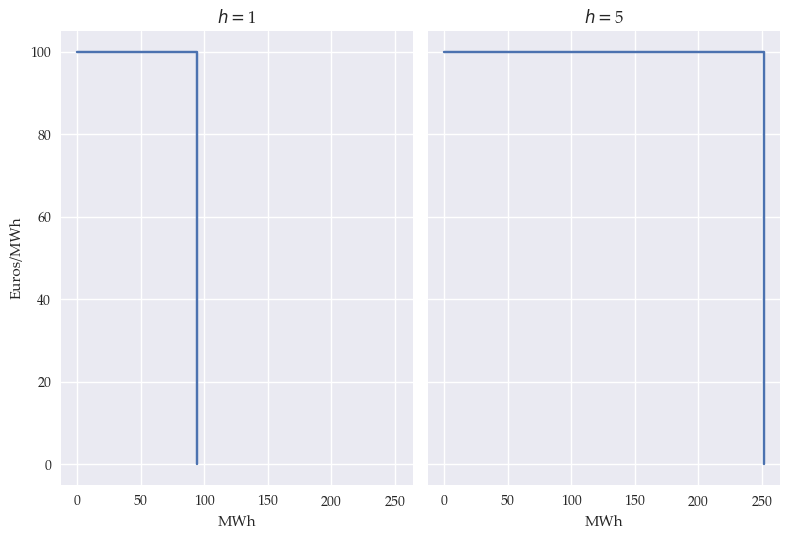

In [14]:
fig, ax = plt.subplots(ncols=2,sharex=True,sharey=True)
for i in range(len(h_grid)):
    h = h_grid[i]
    ax[i].step(df_Hd.xs(h,level='h')['H_cs'],df_Hd.xs(h,level='h')['mwp'])
    ax[i].set_title(r'$h=$'+str(h))
    
[ax[i].set_xlabel('MWh') for i in [0,1]];
ax[0].set_ylabel('Euros/MWh')
fig.tight_layout()

## E2.1

__Compute and illustrate the hourly supply curve (i.e. the merit order curve) for heat for hours $h=\{1,5\}$. Include also the demand curve and the optimal value ${\lambda^H_h}^*$ Finally, discuss how the reservation price of heat can be negative in $h=1$.__

*Note: To compute the supply curve, you have to realize the the reservation price for back-pressure plants and heat pumps is not equal to their marginal costs $(mc_i)$ because their reservation price depend on the electricity market. Therefore, you may draw the supply curve given the optimal value ${\lambda_{h}^{E}}^{*}$.*

*Furthermore, the graph should look something like this:*

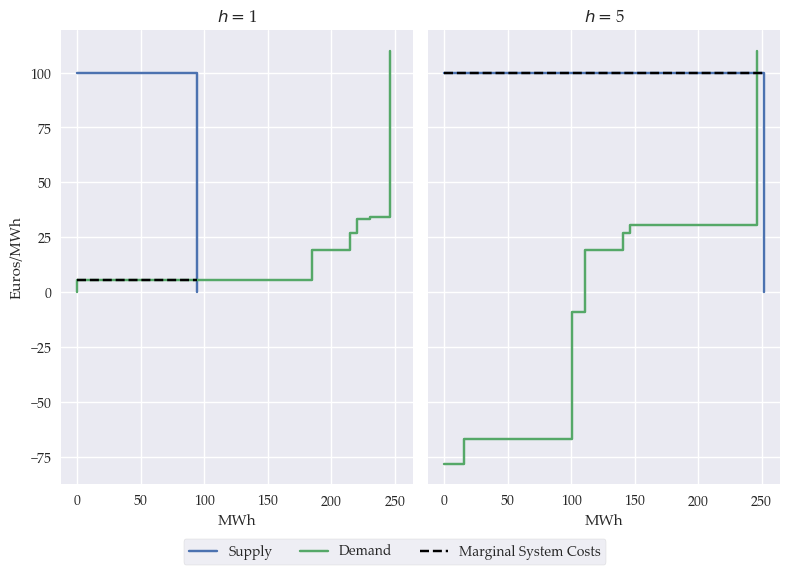

In [15]:
Image(os.path.join(figs_path,'E2.1_sol.png'))

---

Note: reservation prices on heat is negative for a couple of BP plants as price on electricity at maximum, so they earn a lot on the electricity market. So they would accept a negative price on heat to produce.

---

**Solution**

*Supply*

First, we find the capacities for generating heat:

In [16]:
db['E2H']

id
g1_BP_Coal       0.84
g1_BP_NatGas      1.3
g1_BP_BioMass    0.49
g1_HP           -0.29
Name: E2H, dtype: object

In [16]:
HCap = pd.concat([
    m.hourlyGeneratingCap_H.loc[H_id,:],
    m.hourlyGeneratingCap_E.loc[BP_id,:].div(db['E2H'].loc[BP_id]),
],axis=0)
HCap

id             h  
g1_BH_BioMass  1            5.3
               2            5.3
               3            5.3
               4            5.3
               5            5.3
                        ...    
g1_BP_NatGas   284    15.492308
               285    15.492308
               286    15.492308
               287    15.492308
               288    15.492308
Length: 2016, dtype: object

Next, by isolating $\lambda_h^H$ in eq (2f) and assuming an interior solution we see that back-pressure plants reservation price in the optimum is equal to:
\begin{align}
    \forall i\in\mathcal{I}^{BP}: \quad -c_i + \frac{\lambda_h^{H}}{\nu} + {\lambda_h^E}^{*} &= 0&\\
    \frac{\lambda_h^{H}}{\nu} &= c_i - {\lambda_h^E}^{*}&\\
    \lambda_h^{H} &= \nu_i \left(c_i - {\lambda_h^E}^{*}\right)&\\
    {r^{H}_{i,h}}^{*} &= \nu_i \left(c_i-{\lambda_h^E}^{*}\right)&,
\end{align}



which can be computed as:

In [17]:
rH_BP = pd.Series(0,index = HCap.loc[BP_id,:].index).add(m.db['mc'].loc[BP_id]).sub(m.db['marginalSystemCosts_E']).mul(db['E2H'].loc[BP_id]).droplevel('g').reorder_levels(HCap.index.names)
rH_BP

id             h  
g1_BP_BioMass  1       33.11293
g1_BP_Coal     1       5.661736
g1_BP_NatGas   1      34.222356
g1_BP_BioMass  2      24.311229
g1_BP_Coal     2      -9.426894
                        ...    
               287     5.661736
g1_BP_NatGas   287    34.222356
g1_BP_BioMass  288     33.11293
g1_BP_Coal     288     5.661736
g1_BP_NatGas   288    34.222356
Length: 864, dtype: object

Simiarly, isolating for $\lambda_h^H$ in (2h), the reservation price of heat pumps in optimum is

\begin{align}
    \forall i\in\mathcal{I}^{HP}: \quad {r^H_{i,h}}^{*} = c_i - \nu_i{\lambda_h^E}^{*},
\end{align}

which can be computed as:

*Note: watch out for the order of subtracting/multiplying and adding. First mention term that is multiplied and then add marginal costs.*


In [18]:
rH_HP = pd.Series(0,index=HCap.loc[HP_id,:].index).sub(m.db['marginalSystemCosts_E']).mul(db['E2H'].loc[HP_id]).add(m.db['mc'].loc[HP_id]).droplevel('g').reorder_levels(HCap.index.names)
rH_HP

id     h  
g1_HP  1       5.661736
       2      10.870905
       3      10.870905
       4      10.870905
       5          30.69
                ...    
       284    10.870905
       285    10.870905
       286     5.661736
       287     5.661736
       288     5.661736
Length: 288, dtype: object

Finally, the reservation price of standard heat producing plants are simply equal to their marginal costs, i.e.

In [19]:
rH_Std = pd.Series(0,index=HCap.loc[StdH_id,:].index).add(m.db['mc'].loc[StdH_id]).reorder_levels(HCap.index.names)
rH_Std

id             h  
g1_BH_BioMass  1      26.87003
               2      26.87003
               3      26.87003
               4      26.87003
               5      26.87003
                        ...   
g1_SH          284        0.21
               285        0.21
               286        0.21
               287        0.21
               288        0.21
Length: 864, dtype: object

Now we can collect all reservation prices in a common dataframe:

In [20]:
rH = pd.concat([rH_BP,rH_HP,rH_Std],axis=0)

Finally, we can build the supply frame:

In [21]:
df_Hs = pd.concat([HCap.rename('H').astype(float),rH.rename('r').astype(float)],axis=1)
mi_Hs_lo = pd.MultiIndex.from_product([['0'],db['h']],names=df_Hs.index.names)
df_Hs_lo = pd.concat([
    pd.Series(0,index=mi_Hs_lo).rename('H'),
    pd.Series(df_Hs.groupby('h')['r'].min().sub(ϵ).values,index=mi_Hs_lo,name='r')
],axis=1)
mi_Hs_up = pd.MultiIndex.from_product([['-1'],db['h']],names=df_Hs.index.names)
df_Hs_up = pd.concat([
    pd.Series(ϵ,index=mi_Hs_up).rename('H'),
    pd.Series(m.db['MWP_H']*1.1,index=mi_Hs_up,name='r')
],axis=1)
df_Hs = pd.concat([df_Hs,df_Hs_up,df_Hs_lo],axis=0).sort_values(['h','r'])
df_Hs['H_cs'] = df_Hs.groupby('h')['H'].transform('cumsum')

In [22]:
df_Hs

H           r        H_cs
id            h                                        
0             1    0.000000e+00    0.210000    0.000000
g1_SH         1    0.000000e+00    0.210000    0.000000
g1_HP         1    1.000000e+02    5.661736  100.000000
g1_BP_Coal    1    8.488095e+01    5.661736  184.880952
g1_BH_NatGas  1    2.969000e+01   19.301400  214.570952
...                         ...         ...         ...
              288  2.969000e+01   19.301400  214.570952
g1_BH_BioMass 288  5.300000e+00   26.870030  219.870952
g1_BP_BioMass 288  1.081633e+01   33.112930  230.687279
g1_BP_NatGas  288  1.549231e+01   34.222356  246.179587
-1            288  2.220446e-10  110.000000  246.179587

[2592 rows x 3 columns]

*Plot*

And then plot the equilibrium for the two hours:

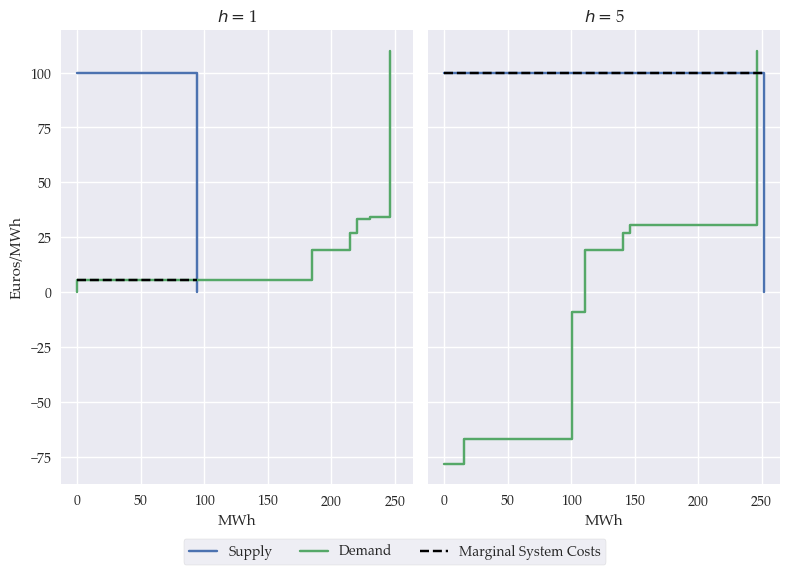

In [23]:
fig, ax = plt.subplots(ncols=2,sharex=True,sharey=True)
for i in range(len(h_grid)):
    h = h_grid[i]
    # Demand curve:
    ax[i].step(df_Hd.xs(h,level='h')['H_cs'],df_Hd.xs(h,level='h')['mwp'])
    # Supply curve:
    ax[i].step(df_Hs.xs(h,level='h')['H_cs'],df_Hs.xs(h,level='h')['r'])
    # Horizontal line indicating the equilibrium price
    ax[i].hlines(xmin=0,xmax=df_Hd.xs(h,level='h')['H'].sum(),y=m.db['marginalSystemCosts_H'].xs(h,level='h').iloc[0],color='black',linestyle='--')
    ax[i].set_title(r'$h=$'+str(h))
    
[ax[i].set_xlabel('MWh') for i in [0,1]];
ax[0].set_ylabel('Euros/MWh')
fig.legend(['Supply','Demand','Marginal System Costs'],loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=True)
fig.tight_layout()

## E2.2

__Illustrate the demand curve for electricity for $h=\{1,5\}$ and comment on why the maximum willingness to pay in $h=5$ is so high.__ 

_Note: For this, you have to illustrate the aggregate demand curve is composed of the sum of the set of conventional consumes $(c_E)$ as well that the sum of heat pumps' maximum capacity for electricity consumption: $-\sum_{i\in\mathcal{I}^E}\nu_iq_{i,h}$. Hence, you will have compute $\text{MWP}^{HP}_h$ using your answer in [E1.4](#E1.4) as well as heat pumps' maximum input capacity of electricity._

_Furthermore, the figure should look something like this:__

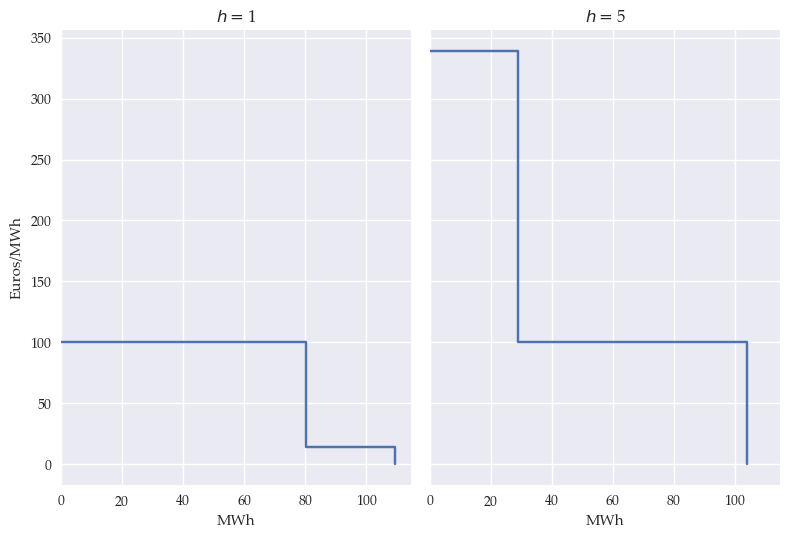

In [24]:
Image(os.path.join(figs_path,'E2.2_sol.png'))

---
**Solution**

First, the reason for the high willingness to pay in $h=5$ $(\mu^E_{HP}=339)$ in hour 5, is that the heating price at its maximum of ${\lambda_5^H}^*=\mu^H=100$. Given the parameter values of $c_{HP}$ and $\nu_{HP}$ it is possible that the heat pump's willingess to pay for electricity is higher than $\mu^E=100$.

Second, for illustrating the graph, we first note that the maximum electricity input capacity of $i\in\mathcal{I}^{HP}$ can be computed as:

*$q_{HP}^E = -q_{HP,h}^H \cdot \nu_{HP}$, note that $\nu_{HP}$ is negative, thus we need a negative sign in front of the equation.*


In [25]:
qE_HP = -m.hourlyGeneratingCap_H.loc[HP_id,:].mul(db['E2H'].loc[HP_id])

Using the answer in [E1.5](#E1.5), $\text{MWP}^{HP}_h$ can be computed as:

$\text{MWP}^{HP}_h = \frac{c_i-\lambda_h^H}{\nu_i}$

In [26]:
MWP_HP = MWP_HP = pd.Series(0,index=HCap.loc[HP_id,:].index).add(m.db['mc'].loc[HP_id]).add(-m.db['marginalSystemCosts_H'].droplevel('g')).div(db['E2H'].loc[HP_id])

We can collect demand from the heat pump together with the perfectly inelastic demand:

In [27]:
# First we create a multiindex for the dataframe
mi_Ed = pd.MultiIndex.from_product([['c1'],db['h']],names=['c_type','h'])

# Now we build a dataframe with the demanded quantity and the marginal willingess to pay.
# Note: we construct dataframe for conventional consumers and HP
df_Ed = pd.concat([
    pd.concat([
        pd.Series(m.hourlyLoad_E.values,index=mi_Ed,name='E'),
        pd.Series(db['MWP_E'],index=mi_Ed,name='mwp')
    ],axis=1),
    pd.concat([
        qE_HP.rename('E'),
        MWP_HP.rename('mwp')
    ],axis=1).rename_axis(index={'id':'c_type'})
],axis=0).astype(float)

For plotting, we just need to add the upper and lower points:

In [28]:
mi_Ed_up = pd.MultiIndex.from_product([['0'],db['h'].tolist()],names=['c_type','h'])
df_Ed_up = pd.concat([
    pd.Series(-ϵ,index=mi_Ed_up,name='E'),
    pd.Series(df_Ed.groupby('h')['mwp'].max().values+ϵ,index=mi_Ed_up,name='mwp')
],axis=1)
mi_Ed_lo = pd.MultiIndex.from_product([['-1'],db['h'].tolist()],names=['c_type','h'])
df_Ed_lo = pd.concat([
    pd.Series(ϵ,index=mi_Ed_lo,name='E'),
    pd.Series(loλ,index=mi_Ed_lo,name='mwp')
],axis=1)
df_Ed = pd.concat([df_Ed,df_Ed_up,df_Ed_lo],axis=0).sort_values(['h','mwp'],ascending=[True,False]).astype(float)
df_Ed['E_cs'] =df_Ed.groupby('h')['E'].transform('cumsum')

And now we can plot it:

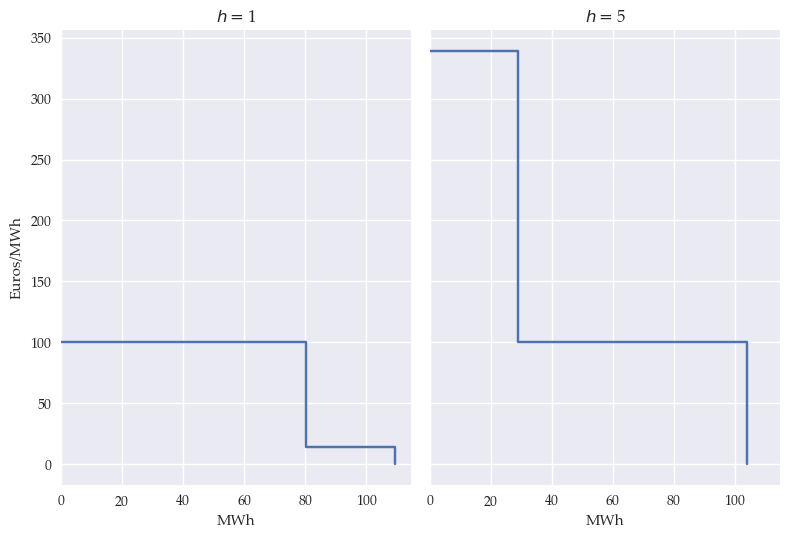

In [29]:
fig, ax = plt.subplots(ncols=2,sharex=True,sharey=True)
for i in range(len(h_grid)):
    h = h_grid[i]
    ax[i].step(df_Ed.xs(h,level='h')['E_cs'],df_Ed.xs(h,level='h')['mwp'])
    ax[i].set_title(r'$h=$'+str(h))
    
[ax[i].set_xlabel('MWh') for i in [0,1]];
ax[0].set_xlim(left=0)
ax[0].set_ylabel('Euros/MWh')
fig.tight_layout()

## E2.3

__Compute and illustrate the hourly supply curve (i.e. the merit order curve) for electricity for hours $h=\{1,5\}$. Include also the demand curve and the optimal value ${\lambda^E_h}^*$.__

*Hint: The figure should look something like this:*

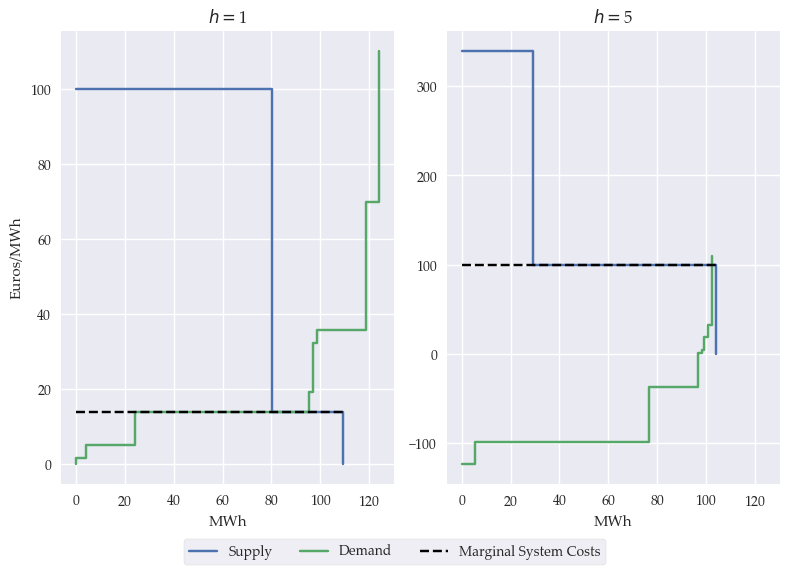

In [30]:
Image(os.path.join(figs_path,'E2.3_sol.png'))

---
**Solution**

*Supply*

First, we find the capacities for producing electricity.

In [31]:
ECap = m.hourlyGeneratingCap_E.loc[E_id,:]
ECap

id             h  
g1_BP_BioMass  1            5.3
               2            5.3
               3            5.3
               4            5.3
               5            5.3
                        ...    
g1_WS          284    19.692423
               285    19.519337
               286    19.769678
               287    20.076944
               288     0.412484
Name: 0, Length: 2304, dtype: object

In [32]:
# Find unique values of a 'id' column
ECap.index.get_level_values(0).unique()

Index(['g1_BP_BioMass', 'g1_BP_Coal', 'g1_BP_NatGas', 'g1_CD_Coal',
       'g1_CD_NatGas', 'g1_PV', 'g1_WL', 'g1_WS'],
      dtype='object', name='id')

In [33]:
BP_id

Index(['g1_BP_BioMass', 'g1_BP_Coal', 'g1_BP_NatGas'], dtype='object', name='id')

From [E1.4](#E1.4) we know, that the back-pressure plant's reservation price for electricity is:

$r_{i,h}^E = c_i - \frac{\lambda_h^H}{\nu_i}$

In [34]:
# Calculation reservation price
rE_BP = pd.Series(0,index=ECap.loc[BP_id,:].index).sub(m.db['marginalSystemCosts_H']).div(db['E2H'].loc[BP_id]).add(m.db['mc'].loc[BP_id]).droplevel('g').reorder_levels(ECap.index.names)
rE_BP

id             h  
g1_BP_BioMass  1      69.718485
g1_BP_Coal     1       13.69564
g1_BP_NatGas   1      35.665348
g1_BP_BioMass  2      59.087527
g1_BP_Coal     2       7.494248
                        ...    
               287     13.69564
g1_BP_NatGas   287    35.665348
g1_BP_BioMass  288    69.718485
g1_BP_Coal     288     13.69564
g1_BP_NatGas   288    35.665348
Length: 864, dtype: object

The reservation prices for standard electricity producing plants are simply equal to their marginal costs, i.e.

In [35]:
rE_Std = pd.Series(0,index=ECap.loc[StdE_id,:].index).add(m.db['mc'].loc[StdE_id])
rE_Std

id          h  
g1_CD_Coal  1      19.009728
            2      19.009728
            3      19.009728
            4      19.009728
            5      19.009728
                     ...    
g1_WS       284          5.0
            285          5.0
            286          5.0
            287          5.0
            288          5.0
Length: 1440, dtype: object

Now we can collect the reservation prices in a common dataframe:

In [36]:
rE = pd.concat([rE_BP, rE_Std],axis=0)

Finally, we can build the supply frame:

In [37]:
df_Es = pd.concat([ECap.rename('E').astype(float),rE.rename('r').astype(float)],axis=1)
mi_Es_lo = pd.MultiIndex.from_product([['0'],db['h']],names=df_Hs.index.names)
df_Es_lo = pd.concat([
    pd.Series(0,index=mi_Es_lo).rename('E'),
    pd.Series(df_Es.groupby('h')['r'].min().sub(ϵ).values,index=mi_Es_lo,name='r')
],axis=1)
mi_Es_up = pd.MultiIndex.from_product([['-1'],db['h']],names=df_Es.index.names)
df_Es_up = pd.concat([
    pd.Series(ϵ,index=mi_Es_up).rename('E'),
    pd.Series(m.db['MWP_E']*1.1,index=mi_Es_up,name='r')
],axis=1)
df_Es = pd.concat([df_Es,df_Es_up,df_Es_lo],axis=0).sort_values(['h','r'])
df_Es['E_cs'] = df_Es.groupby('h')['E'].transform('cumsum')

In [38]:
df_Es

,,E,r,E_cs
id,h,,,
0,1,0.000000e+00,-2.220446e-10,0.000000
g1_PV,1,0.000000e+00,0.000000e+00,0.000000
g1_WL,1,3.956532e+00,1.500000e+00,3.956532
g1_WS,1,2.029660e+01,5.000000e+00,24.253136
g1_BP_Coal,1,7.130000e+01,1.369564e+01,95.553136
...,...,...,...,...
g1_CD_Coal,288,1.600000e+00,1.900973e+01,103.309746
g1_CD_NatGas,288,1.600000e+00,3.227745e+01,104.909746
g1_BP_NatGas,288,2.014000e+01,3.566535e+01,125.049746


*Plot*

We can then plot the equilibrium for the two hours:

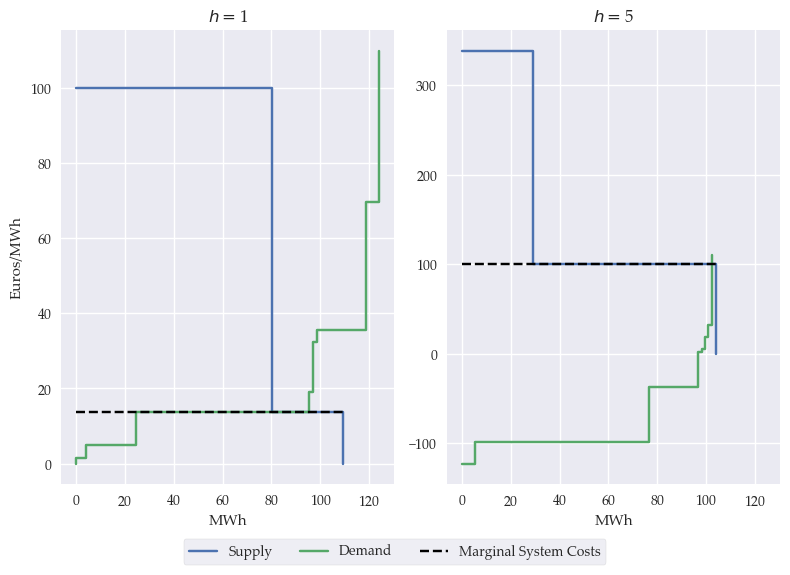

In [39]:
fig, ax = plt.subplots(ncols=2,sharex=True,sharey=False)
for i in range(len(h_grid)):
    h = h_grid[i]
    # Demand curve:
    ax[i].step(df_Ed.xs(h,level='h')['E_cs'],df_Ed.xs(h,level='h')['mwp'])
    # Supply curve:
    ax[i].step(df_Es.xs(h,level='h')['E_cs'],df_Es.xs(h,level='h')['r'])
    # Horizontal line indicating the equilibrium price
    ax[i].hlines(xmin=0,xmax=df_Ed.xs(h,level='h')['E'].sum(),y=m.db['marginalSystemCosts_E'].xs(h,level='h').iloc[0],color='black',linestyle='--')
    ax[i].set_title(r'$h=$'+str(h))
    
[ax[i].set_xlabel('MWh') for i in [0,1]];
ax[0].set_ylabel('Euros/MWh')
fig.legend(['Supply','Demand','Marginal System Costs'],loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=True)
fig.tight_layout()

## E2.4

In this exercise you are asked to simulate the effects of increasing the heat pump capacity. We will do so by solving the model over of an exogenous grid of the heat pump capacity. For making the grid, the `pyDbs` package has a class called `adjMultiIndex`, which has a function called _addGrid_. It takes the four central arguments:

```python
adjMultiIndex.addGrid(v0,vT,index,name)
```
where 
- v0 is a Pandas Index specifying the first element of the grid. 
- vT is a Pandas Index specifying the last element of the grid.
- index is a Pandas Index specifying the number points in the grid.
- name is the name of the variable, we are changing. 

The following makes the grid:

In [40]:
loop = pd.Index(range(11), name = 'l1')
v0 = pd.Series(0.01, index = pd.Index(['g1_HP'], name = 'id'), name = 'GeneratingCap_H')
vT = v0+100
grid = adjMultiIndex.addGrid(v0,vT,index=loop,name='GeneratingCap_H')

__Now use the 'loopSolveExtract'-function in the `modelShell`-class to solve the model of the exogenous grid. Furthermore, extract the following list of variables:__
```python
extract = [
    'meanConsumerPrice_E','meanConsumerPrice_H', # average yearly consumer prices
    'marginalEconomicValue' # marginal economic value of capacity
]
```

---
**Solution**

In [41]:
extract = [
    'meanConsumerPrice_E','meanConsumerPrice_H', # average yearly consumer prices
    'marginalEconomicValue' # marginal economic value of capacity
]

In [42]:
solution = m.loopSolveExtract(loop, [grid], extract)
solution

{'meanConsumerPrice_E': g   c_E  l1
 g1  c1   0     41.137500
          1     42.908116
          2     44.351215
          3     45.245542
          4     45.608927
          5     45.990169
          6     46.339927
          7     46.479234
          8     47.032881
          9     47.603178
          10    47.901323
 dtype: float64,
 'meanConsumerPrice_H': g   c_H  l1
 g1  c1   0     48.043052
          1     45.019557
          2     40.886830
          3     37.744340
          4     36.272660
          5     32.151908
          6     30.393234
          7     28.150436
          8     24.044772
          9     22.295966
          10    18.295383
 dtype: float64,
 'marginalEconomicValue': id             l1
 g1_BH_BioMass  0     4352.233089
                1     3774.362113
                2     3059.245129
                3     2504.675151
                4       2192.4274
                         ...     
 g1_WS          6      1793.52413
                7      1809.32083
      

## E2.5

Consider the following figure illustrating the _marginal economic value of generating capacity_ as a function of installed heat pump capacity split into electricity generators $(i\in\mathcal{I}^{E})$, heat generators $(i\in\mathcal{I}^{H})$, and back-pressure plants $(i\in\mathcal{I}^{BP})$:

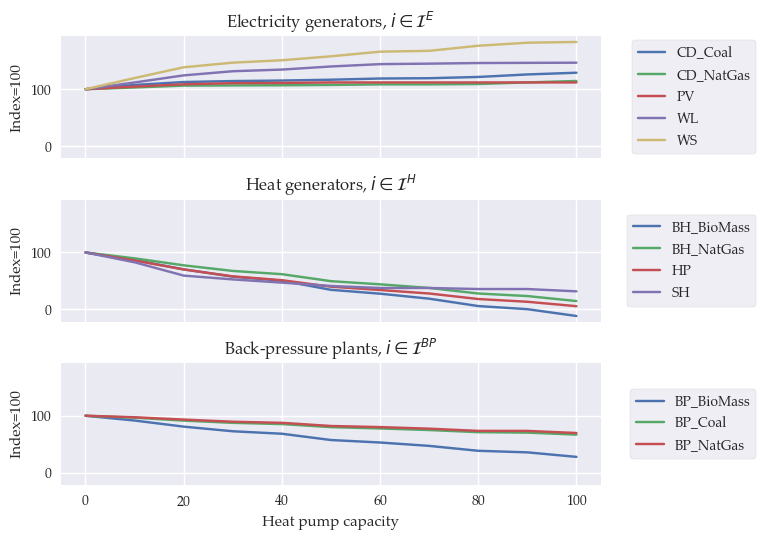

In [43]:
Image(os.path.join(figs_path,'E2.5_sol.png'))

__Define the marginal economic value of capacity and explain the effect of the heat pump capacity on the marginal economic value of generating capacity for (i) electricity producing plants, (ii) heat generating plants, and (iii) back-pressure plants.__

---
**Solution**
$\Rightarrow$ see 'E41_SolutionGuide'